<a href="https://colab.research.google.com/github/somanathrotte/Circuit_Design_AI_Project/blob/main/FPGA_ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Replace the placeholder distance matrix with your actual distances
# For simplicity, let's assume a small 5x5 FPGA with random distances
num_nodes = 5
distance_matrix = np.random.rand(num_nodes, num_nodes)

# Make the matrix symmetrical (assuming undirected connections)
distance_matrix = (distance_matrix + distance_matrix.T) / 2

# Ensure diagonal elements are set to zero (no distance from a component to itself)
np.fill_diagonal(distance_matrix, 0)

import numpy as np
import random

# Define the FPGA Placement Problem
class FPGAPositioningProblem:
    def __init__(self, num_nodes, distance_matrix):
        self.num_nodes = num_nodes
        self.distance_matrix = distance_matrix

    def calculate_total_distance(self, solution):
        total_distance = 0
        for i in range(self.num_nodes - 1):
            total_distance += self.distance_matrix[solution[i]][solution[i + 1]]
        total_distance += self.distance_matrix[solution[-1]][solution[0]]  # Return to the starting node
        return total_distance

# Ant Colony Optimization Algorithm
class AntColonyPlacement:
    def __init__(self, problem, num_ants, generations, alpha=1, beta=2, rho=0.5, q0=0.7):
        self.problem = problem
        self.num_ants = num_ants
        self.generations = generations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q0 = q0
        self.pheromone_matrix = np.ones((problem.num_nodes, problem.num_nodes))

    def run(self):
        best_solution = None
        best_distance = float('inf')

        for generation in range(self.generations):
            solutions = self.generate_solutions()
            self.update_pheromones(solutions)

            # Evaluate solutions and update the best solution
            for solution in solutions:
                distance = self.problem.calculate_total_distance(solution)
                if distance < best_distance:
                    best_distance = distance
                    best_solution = solution

            # Evaporate pheromones
            self.pheromone_matrix *= (1 - self.rho)

        return best_solution, best_distance

    def generate_solutions(self):
        solutions = []
        for ant in range(self.num_ants):
            solution = self.build_solution()
            solutions.append(solution)
        return solutions

    def build_solution(self):
        solution = list(range(self.problem.num_nodes))  # Start with a random solution
        random.shuffle(solution)  # Randomly shuffle the initial solution

        return solution

    def choose_next_node(self, current_node, unvisited_nodes):
        # Use the probability formula to choose the next node
        probabilities = []
        for node in unvisited_nodes:
            pheromone = self.pheromone_matrix[current_node][node]
            distance = 1 / (1 + self.problem.distance_matrix[current_node][node])
            probabilities.append((node, pheromone ** self.alpha * distance ** self.beta))

        if np.random.rand() < self.q0:
            # Exploitation: Choose the node with the highest probability
            next_node = max(probabilities, key=lambda x: x[1])[0]
        else:
            # Exploration: Choose a node based on roulette wheel selection
            total_prob = sum(prob[1] for prob in probabilities)
            selected_prob = np.random.uniform(0, total_prob)
            cumulative_prob = 0
            for node, prob in probabilities:
                cumulative_prob += prob
                if cumulative_prob >= selected_prob:
                    next_node = node
                    break

        return next_node

    def update_pheromones(self, solutions):
        for i in range(self.problem.num_nodes):
            for j in range(self.problem.num_nodes):
                delta_pheromone = 0
                for solution in solutions:
                    if (i, j) in solution or (j, i) in solution:
                        delta_pheromone += 1 / self.problem.calculate_total_distance(solution)

                self.pheromone_matrix[i][j] = (1 - self.rho) * self.pheromone_matrix[i][j] + delta_pheromone

# Example Usage
if __name__ == "__main__":
    # Define the FPGA Placement Problem
    num_nodes = 10  # Number of nodes or FPGA components
    distance_matrix = np.random.rand(num_nodes, num_nodes)  # Placeholder for the distance matrix

    placement_problem = FPGAPositioningProblem(num_nodes, distance_matrix)

    # Initialize the Ant Colony Optimization algorithm
    ant_colony = AntColonyPlacement(problem=placement_problem, num_ants=10, generations=50)

    # Run the algorithm
    best_solution, best_distance = ant_colony.run()

    # Print the results
    print("Best Solution:", best_solution)
    print("Best Distance:", best_distance)

# Define the FPGA Placement Problem
placement_problem = FPGAPositioningProblem(num_nodes, distance_matrix)

Best Solution: [4, 6, 2, 7, 8, 3, 9, 5, 1, 0]
Best Distance: 2.6624010880608484


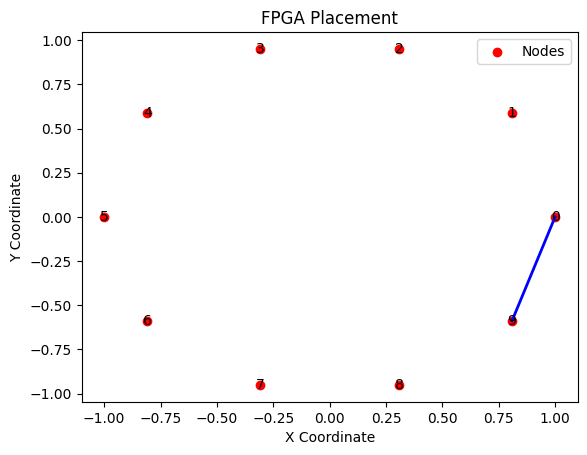

In [ ]:
def plot_fpga_placement(solution, distance_matrix):
    num_nodes = 10

    # Extract x, y coordinates from the distance matrix (or provide your own coordinates)
    coordinates = np.array([(np.cos(2 * np.pi * i / num_nodes), np.sin(2 * np.pi * i / num_nodes)) for i in range(num_nodes)])

    # Plot the nodes
    plt.scatter(coordinates[:, 0], coordinates[:, 1], c='red', marker='o', label='Nodes')

    # Plot the connections
    for i in range(num_nodes):
        plt.text(coordinates[i, 0], coordinates[i, 1], str(i), ha='center', va='center', fontsize=10)
        for j in range(i+1, num_nodes):
            if (i, j) in solution or (j, i) in solution:
                plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], c='blue', linestyle='-', linewidth=2)

    # Connect the last and first nodes to close the loop
    plt.plot([coordinates[-1, 0], coordinates[0, 0]], [coordinates[-1, 1], coordinates[0, 1]], c='blue', linestyle='-', linewidth=2)

    plt.title('FPGA Placement')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Assuming you have already run the Ant Colony Optimization algorithm
    # and obtained the best solution and distance matrix
    best_solution, best_distance = ant_colony.run()

    # Plot the FPGA placement
    plot_fpga_placement(best_solution, distance_matrix)
